In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Last data point in the database
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Last Year Date: ",last_year_date)

Last Year Date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
precipitation= session.query(measurement.date, measurement.prcp).\
                filter(measurement.date >= last_year_date).all()
precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df= pd.DataFrame(precipitation, columns=['date', 'precipitation'])
precip_df.set_index('date', inplace=True)

# Sort the dataframe by date
precip_df.sort_values(by="date")

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


([<matplotlib.axis.XTick at 0x1288ae310>,
 <a list of 6 Text xticklabel objects>)

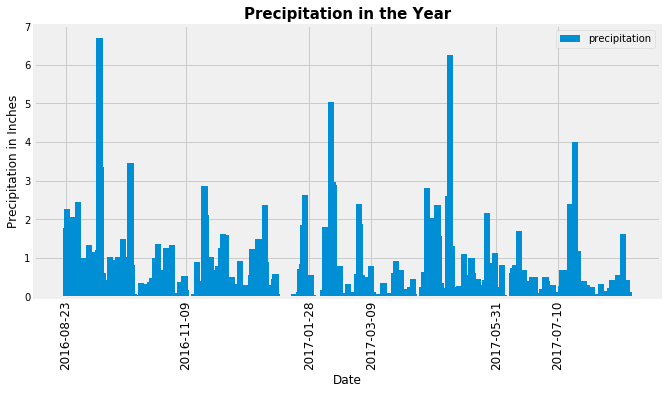

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
xticks=["2016-08-23", "2016-11-09", "2017-01-28", "2017-03-09",\
         "2017-05-31", "2017-07-10"]

plt.figure(figsize=(10,5))
plt.bar(precip_df.index, precip_df["precipitation"], label="precipitation", width= 4)
plt.legend(loc="best")
plt.title("Precipitation in the Year", fontsize=15, fontweight="bold")
plt.ylabel("Precipitation in Inches", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.xticks(ticks=xticks, labels= xticks, rotation=90, fontsize=12)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
total_stations=session.query(station.id).count()
total_stations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_act=session.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station).\
                        order_by(func.count(measurement.station).desc()).all()

most_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Which station has the highest number of observations?
highest_station = most_act[0][0]
print(f"The station with the most active: {highest_station}.")

The station with the most active: USC00519281.


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?
station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()
print(f" The lowest temp, highest temp and avg temp recorded for the most active station USC00519281 is:", station)

 The lowest temp, highest temp and avg temp recorded for the most active station USC00519281 is: [(54.0, 85.0, 71.66378066378067)]


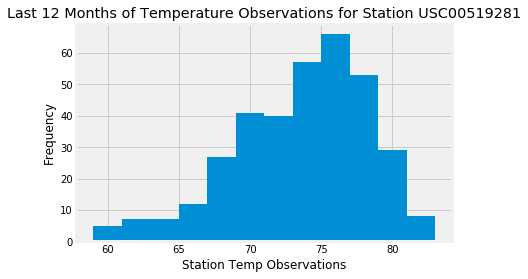

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_ob = session.query(measurement.tobs).\
filter(measurement.station == "USC00519281").\
filter(measurement.date >= "2016-08-23").all()

data = pd.DataFrame(station_ob, columns = ['tobs'])

plt.hist(data['tobs'], bins=12)
plt.xlabel('Station Temp Observations')
plt.ylabel('Frequency')
plt.title('Last 12 Months of Temperature Observations for Station USC00519281')

plt.show()